In [266]:
import numpy as np
import pandas as pd

In [267]:
evi=pd.read_csv('evi_medio.csv',parse_dates=['system:time_start'])

In [268]:
evi.rename(columns={'system:time_start': 'Date'}, inplace=True)

In [269]:
evi.head()

,Date,EVI
0,2014-01-01,0.031
1,2014-01-02,0.090
2,2014-01-03,0.311
3,2014-01-04,0.265
4,2014-01-05,0.205


In [270]:
evi['date_check'] = evi.Date.diff()
evi.date_check.value_counts()

1 days     1963
2 days        1
10 days       1
Name: date_check, dtype: int64

In [271]:
LST=pd.read_csv('LST_day.csv',parse_dates=['system:time_start'] ,thousands=r',')

In [272]:
LST.rename(columns={'system:time_start': 'Date'}, inplace=True)
LST.head()

,Date,LST_Day_1km
0,2014-01-01,NaN
1,2014-01-02,NaN
2,2014-01-03,NaN
3,2014-01-04,14903.0
4,2014-01-05,15185.0


In [273]:
LST['date_check'] = LST.Date.diff()
LST.date_check.value_counts()

1 days     1965
10 days       1
Name: date_check, dtype: int64

In [274]:
mask = (LST['Date'] >= '2018-04-04') & (LST['Date'] <= '2018-12-20')
filtered_LST=LST.loc[mask]
print(filtered_LST.shape)
LST.set_index('Date',inplace=True)

#filtered_LST.dropna(inplace=True)

(261, 3)


In [275]:
filtered_LST.head()
filtered_LST.LST_Day_1km=filtered_LST.LST_Day_1km.astype(float)*0.02
filtered_LST.LST_Day_1km= filtered_LST.LST_Day_1km.interpolate(method='spline', order=2)

/home/usuariousuario/anaconda3/envs/INE/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


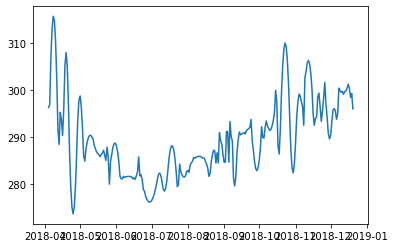

In [276]:
plt.plot(filtered_LST.Date,filtered_LST.LST_Day_1km)

In [277]:
print(LST.isnull().sum())
LST.shape

LST_Day_1km    1002
date_check        1
dtype: int64


(1967, 2)

In [278]:
LAI=pd.read_csv('LAI.csv',parse_dates=['system:time_start'])
LAI.rename(columns={'system:time_start': 'Date'}, inplace=True)
LAI.Lai=LAI.Lai*0.1
mask = (LAI['Date'] >= '2018-04-04') & (LAI['Date'] <= '2018-12-20')
filtered_LAI=LAI.loc[mask]
print(filtered_LAI.shape)
LAI.set_index('Date',inplace=True)
LAI.head()

(65, 2)


,Lai
Date,
2014-01-01,1.0793
2014-01-05,1.1585
2014-01-09,1.0170
2014-01-13,0.9585
2014-01-17,1.0585


In [279]:
evi.head()
filtered_df.set_index('Date',inplace=True)

In [280]:
merge=pd.merge(filtered_df,LAI, how='left', left_index=True, right_index=True)
merge.head()


merge['Lai'] = merge.Lai.interpolate(method='spline', order=2)
merge['EVI'] = merge.EVI.interpolate(method='spline', order=2)
merge['Lai'].loc[np.isnan(merge['Lai'])]=1.337800

/home/usuariousuario/anaconda3/envs/INE/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [281]:
np.isnan(merge.EVI).sum()

0

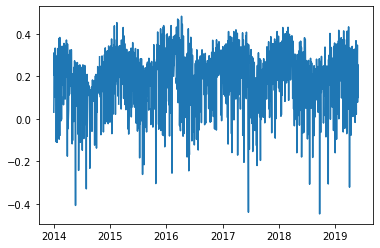

In [282]:
import matplotlib.pyplot as plt

plt.plot(evi.Date,evi.EVI)

In [313]:
mett=pd.read_csv('datos_diario_mean_merge.csv',parse_dates=['fecha'])
mett.head()

,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,...,Rho_air,A,one,Ga_ustar,two,three,Rc,Gs,hour,month
0,2018-04-04,3866.5,94.0,5.607250,26.132500,45.342500,26.780000,47.230000,26.207500,46.372500,...,0.096127,294.428934,7.472772,0.049924,0.0,2.651702,-96.461880,0.000992,15.0,4.0
1,2018-04-05,3952.5,95.0,5.081333,22.771250,58.368750,23.418333,59.645833,22.900833,59.386667,...,0.097225,285.480650,8.073458,0.048432,0.0,2.348445,-80.092329,0.000954,12.5,4.0
2,2018-04-06,4048.5,96.0,5.330833,15.487917,53.192083,15.729167,53.759583,15.650000,52.702917,...,0.099672,85.871880,3.265257,0.054436,0.0,1.767871,-62.603316,0.002319,12.5,4.0
3,2018-04-07,4144.5,97.0,0.823292,18.569583,71.067500,19.247917,71.048750,18.759167,71.447083,...,0.098620,252.173661,8.458697,inf,0.0,1.994720,-65.150449,0.000138,12.5,4.0
4,2018-04-08,4240.5,98.0,1.146875,19.700417,72.800417,20.368333,72.692500,19.860833,73.241667,...,0.098244,223.174580,7.269576,inf,0.0,2.089725,-71.523981,0.000204,12.5,4.0


In [318]:
mett.tail()

,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,...,Rho_air,A,one,Ga_ustar,two,three,Rc,Gs,hour,month
190,2018-12-16,28432.500000,350.0,8.608750,29.682917,29.220000,30.334583,30.581667,29.712083,31.567083,...,0.095005,491.104651,10.974185,0.072621,0.0,3.023487,-28.883902,0.001041,12.500000,12.0
191,2018-12-17,28528.714286,351.0,8.399476,16.839524,61.213810,17.770476,57.494762,17.034762,61.186190,...,0.099208,482.192530,17.351687,0.073594,0.0,1.864567,-7.840008,0.000695,12.571429,12.0
192,2018-12-18,28624.500000,352.0,4.221208,18.040833,55.200833,19.285833,51.159583,18.152500,55.644583,...,0.098799,591.668788,20.373144,0.049026,0.0,1.954310,-11.465739,0.000275,12.500000,12.0
193,2018-12-19,28720.500000,353.0,4.705375,21.953750,58.059167,23.066250,54.607500,22.065417,58.770000,...,0.097488,555.376422,16.468337,0.050916,0.0,2.269986,-17.322351,0.000377,12.500000,12.0
194,2018-12-20,28816.500000,354.0,6.336917,22.684167,76.272083,23.691250,72.165417,22.835417,76.770000,...,0.097250,442.847814,12.490296,0.063692,0.0,2.336057,-14.889589,0.002278,12.500000,12.0


In [319]:
mett['date_check'] = mett.fecha.diff()
mett.date_check.value_counts()

1 days     184
2 days       6
3 days       3
55 days      1
Name: date_check, dtype: int64

In [320]:
mett.set_index('fecha',inplace=True)

In [321]:
data=pd.merge(mett,merge, how='left', left_index=True, right_index=True)
data.head()

,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,...,two,three,Rc,Gs,hour,month,date_check_x,EVI,date_check_y,Lai
fecha,,,,,,,,,,,,,,,,,,,,,
2018-04-04,3866.5,94.0,5.607250,26.132500,45.342500,26.780000,47.230000,26.207500,46.372500,582.950000,...,0.0,2.651702,-96.461880,0.000992,15.0,4.0,NaT,0.327,1 days,1.337800
2018-04-05,3952.5,95.0,5.081333,22.771250,58.368750,23.418333,59.645833,22.900833,59.386667,533.370833,...,0.0,2.348445,-80.092329,0.000954,12.5,4.0,1 days,0.298,1 days,1.337800
2018-04-06,4048.5,96.0,5.330833,15.487917,53.192083,15.729167,53.759583,15.650000,52.702917,168.483333,...,0.0,1.767871,-62.603316,0.002319,12.5,4.0,1 days,0.047,1 days,1.337800
2018-04-07,4144.5,97.0,0.823292,18.569583,71.067500,19.247917,71.048750,18.759167,71.447083,448.608333,...,0.0,1.994720,-65.150449,0.000138,12.5,4.0,1 days,0.198,1 days,1.337800
2018-04-08,4240.5,98.0,1.146875,19.700417,72.800417,20.368333,72.692500,19.860833,73.241667,425.787500,...,0.0,2.089725,-71.523981,0.000204,12.5,4.0,1 days,0.141,1 days,0.839273


In [326]:
filtered_LST.set_index('Date',inplace=True)

In [327]:
data=pd.merge(data,filtered_LST, how='left', left_index=True, right_index=True)
data.head()

,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,...,Rc,Gs,hour,month,date_check_x,EVI,date_check_y,Lai,LST_Day_1km,date_check
fecha,,,,,,,,,,,,,,,,,,,,,
2018-04-04,3866.5,94.0,5.607250,26.132500,45.342500,26.780000,47.230000,26.207500,46.372500,582.950000,...,-96.461880,0.000992,15.0,4.0,NaT,0.327,1 days,1.337800,296.280000,1 days
2018-04-05,3952.5,95.0,5.081333,22.771250,58.368750,23.418333,59.645833,22.900833,59.386667,533.370833,...,-80.092329,0.000954,12.5,4.0,1 days,0.298,1 days,1.337800,296.940000,1 days
2018-04-06,4048.5,96.0,5.330833,15.487917,53.192083,15.729167,53.759583,15.650000,52.702917,168.483333,...,-62.603316,0.002319,12.5,4.0,1 days,0.047,1 days,1.337800,306.800010,1 days
2018-04-07,4144.5,97.0,0.823292,18.569583,71.067500,19.247917,71.048750,18.759167,71.447083,448.608333,...,-65.150449,0.000138,12.5,4.0,1 days,0.198,1 days,1.337800,312.988542,1 days
2018-04-08,4240.5,98.0,1.146875,19.700417,72.800417,20.368333,72.692500,19.860833,73.241667,425.787500,...,-71.523981,0.000204,12.5,4.0,1 days,0.141,1 days,0.839273,315.657394,1 days


In [285]:
mask = (evi['Date'] >= '2018-04-04') & (evi['Date'] <= '2018-12-20')
filtered_df=evi.loc[mask]
print(filtered_df.shape)
filtered_df.date_check.value_counts()

(261, 3)


1 days    261
Name: date_check, dtype: int64

In [286]:
# Creating new features
filtered_df['month'] = filtered_df.Date.dt.month_name()

<ipython-input-286-e94ccd8d0e34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df.Date.dt.month_name()


<AxesSubplot:xlabel='month', ylabel='EVI'>

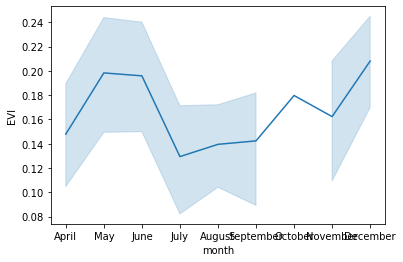

In [287]:
import seaborn as sns

sns.lineplot(x='month',y='EVI',data=filtered_df, sort=False)

<AxesSubplot:xlabel='month', ylabel='LvE[W/m2]      '>

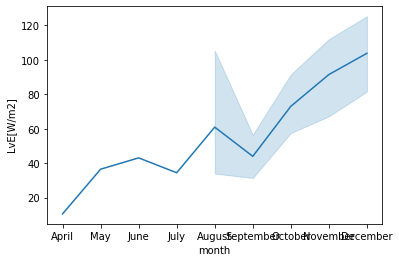

In [16]:
sns.lineplot(x='month',y='LvE[W/m2]      ',data=eddy, sort=False)

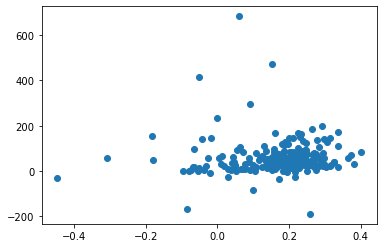

In [18]:
plt.scatter(filtered_df.EVI,eddy['LvE[W/m2]      '])

In [330]:
data['month'] = data.index.month_name()

<AxesSubplot:xlabel='month', ylabel='Gs'>

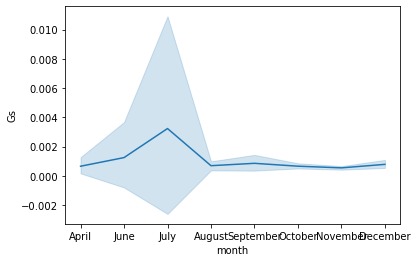

In [331]:
sns.lineplot(x='month',y='Gs',data=data, sort=False)

<AxesSubplot:xlabel='month', ylabel='EVI'>

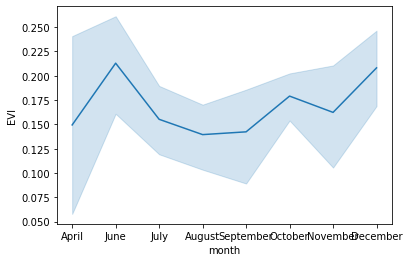

In [332]:
sns.lineplot(x='month',y='EVI',data=data, sort=False)

<AxesSubplot:xlabel='month', ylabel='Lai'>

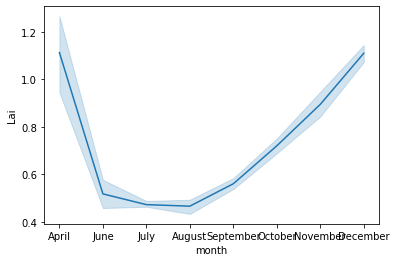

In [333]:
sns.lineplot(x='month',y='Lai',data=data, sort=False)

(0.0, 15.0)

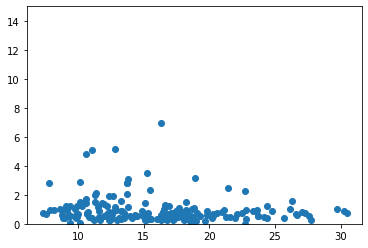

In [334]:
plt.scatter(data.TA1,data.Gs*1000)
plt.ylim(0,15)
#plt.xlim(0,200)

(0.0, 15.0)

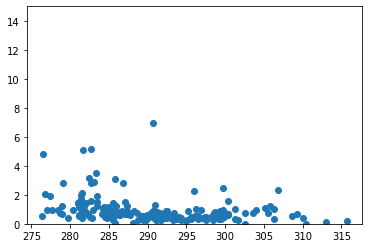

In [328]:
plt.scatter(data.LST_Day_1km,data.Gs*1000)
plt.ylim(0,15)

(0.0, 200.0)

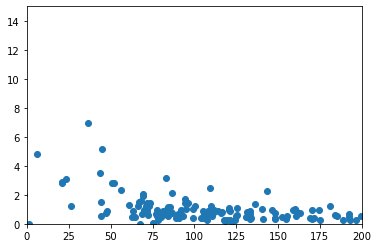

In [335]:
plt.scatter(data['LvE[W/m2]      '],data.Gs*1000)
plt.ylim(0,15)
plt.xlim(0,200)

(0.0, 1.0)

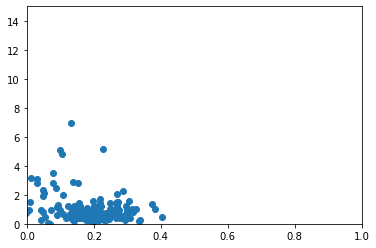

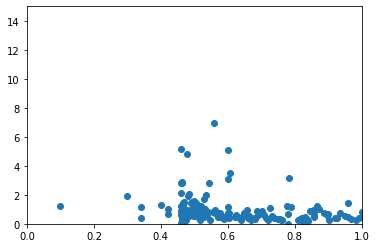

In [324]:
plt.scatter(data.EVI,data.Gs*1000)
plt.ylim(0, 15)
plt.xlim(0,1)

plt.figure()
plt.scatter(data.Lai,data.Gs*1000)
plt.ylim(0, 15)
plt.xlim(0,1)

In [336]:
data.columns

Index(['index', 'Dia juliano_x', 'U', 'TA1', 'HR1', 'TA3', 'HR3', 'TA4', 'HR4',
       'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0', 'Tmin', 'Tmax', 'Rnl',
       'u[m/s]         ', 'Ts[degC]       ', 'a[g/m3]        ',
       'p_ref[hPa]     ', 'Var[u]         ', 'Var[Ts]        ',
       'Var[a]         ', 'dir[deg]       ', 'ustar[m/s]     ',
       'HTs[W/m2]      ', 'LvE[W/m2]      ', 'z/L            ',
       'z/L-virt       ', 'Flag(ustar)    ', 'Flag(HTs)      ',
       'Flag(LvE)      ', ' r_err_ustar[%]', '   r_err_HTs[%]',
       '   r_err_LvE[%]', 'T_min', 'T_max', 'es', 'Delta', 'e', 'epsilon',
       'Rho_air', 'A', 'one', 'Ga_ustar', 'two', 'three', 'Rc', 'Gs', 'hour',
       'month', 'date_check_x', 'EVI', 'date_check_y', 'Lai', 'LST_Day_1km',
       'date_check'],
      dtype='object')

In [363]:
X = data[['TA1','U','Rnl','EVI','Lai','LST_Day_1km','HR1','Ts[degC]       ']].loc[(data.Gs>0)]
y = data.Gs.loc[data.Gs>0 ]*1000

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [365]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [366]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [367]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8125405511120822
Mean Squared Error: 3.7648425321314547
Root Mean Squared Error: 1.940320213813033


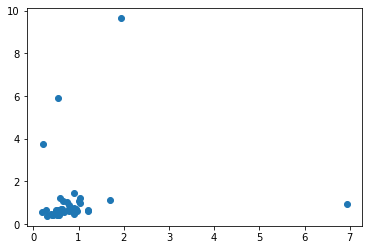

In [368]:
plt.scatter(y_test,y_pred)